In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# importing important libs
import pandas as pd
import numpy as np
from random import shuffle
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from wordcloud import WordCloud, STOPWORDS 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import os
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
import warnings
warnings.filterwarnings('ignore')




#sklearn package 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB,MultinomialNB,GaussianNB 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,precision_score,f1_score


In [2]:
df = pd.read_csv("news-data.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.shape

(2225, 2)

In [4]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
print("The shape of the dataset-------->",df.shape)
print("The number of null values ------>")
print(df.isnull().sum())
column = df.columns
print("The column present there-------->",column)

The shape of the dataset--------> (2225, 2)
The number of null values ------>
category    0
text        0
dtype: int64
The column present there--------> Index(['category', 'text'], dtype='object')


In [7]:
print("The total number category present here------------->",df['category'].nunique())
category=df['category'].value_counts()
print(category)

The total number category present here-------------> 5
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


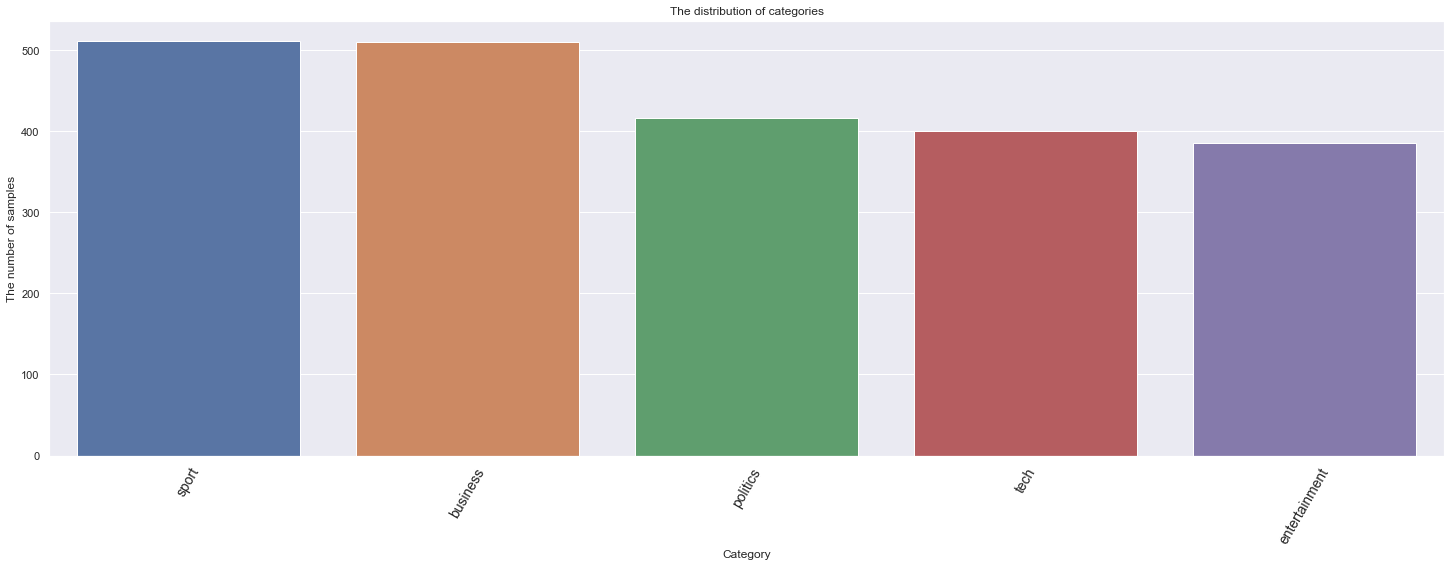

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

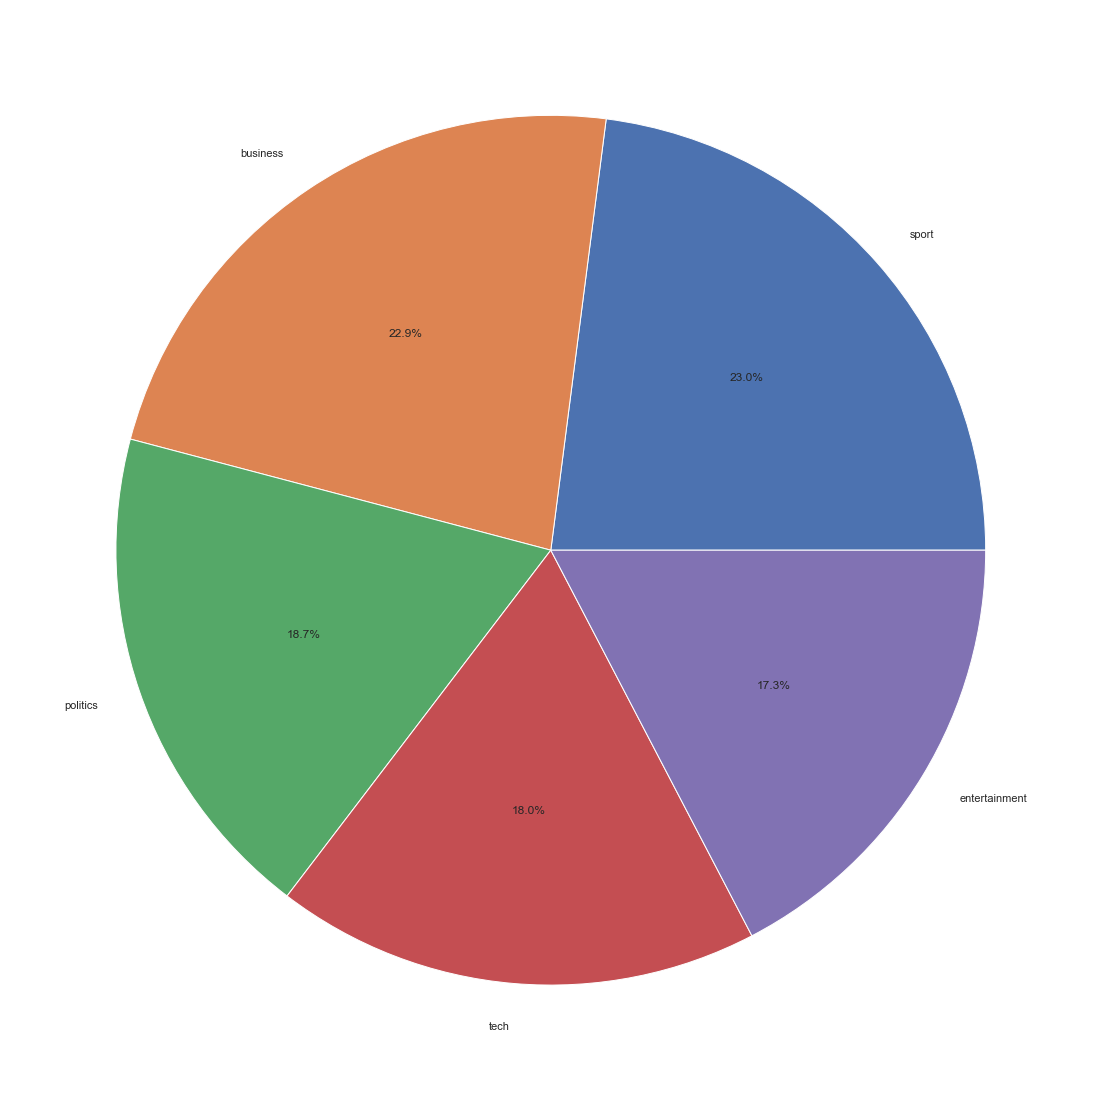

<Figure size 432x288 with 0 Axes>

In [9]:
#pie chart 
plt.figure(figsize=(20,20))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()
plt.savefig(r"./category_pie.png")

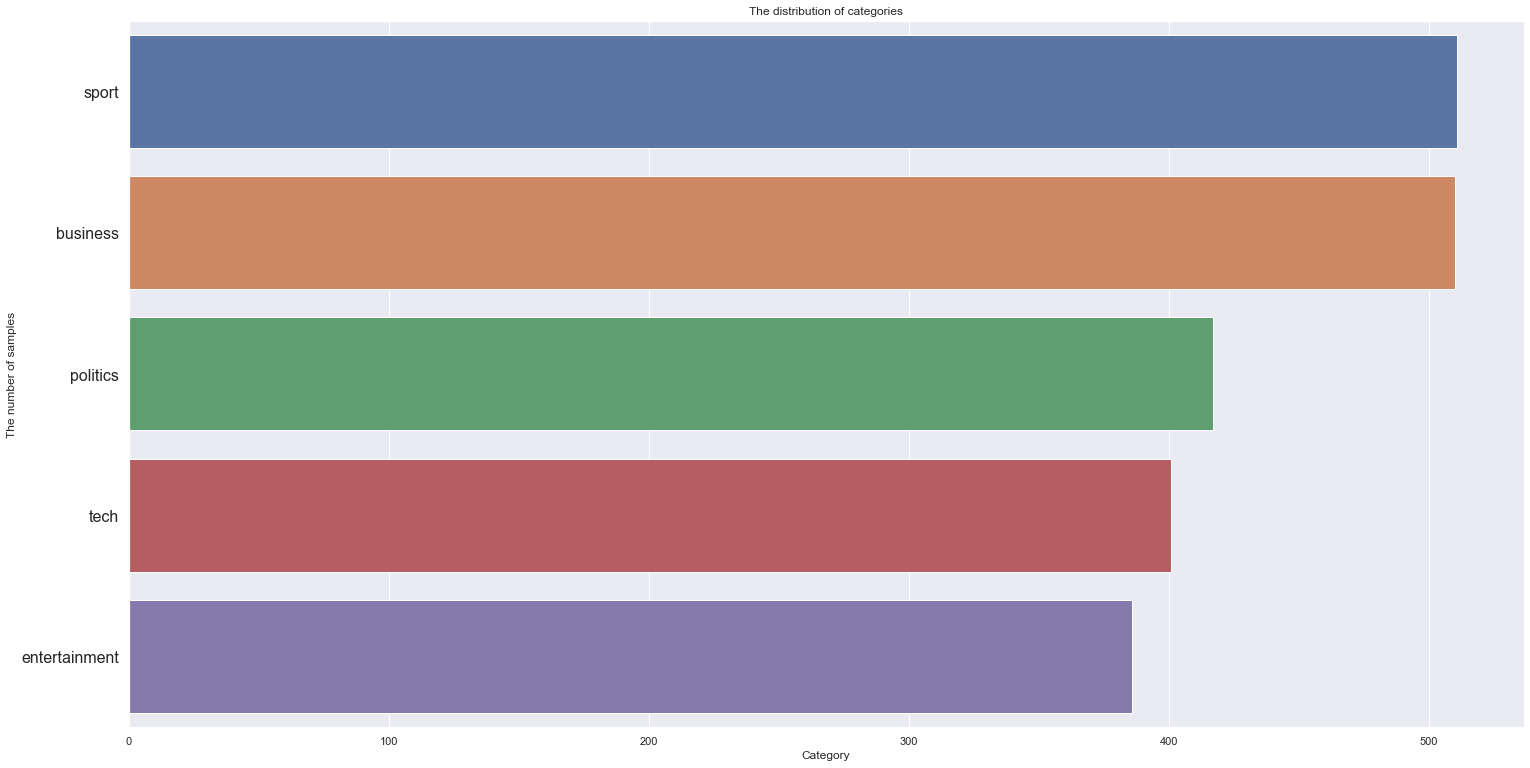

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(25,13))
sns.barplot(y=category.index,x=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 16)
plt.show()
plt.savefig(r"./category_bar.png")

# Handling the null and duplicate values in dataset


In [11]:
#delete the dublicate values
df.duplicated().sum() # count the total duplicate samples

99

In [12]:
df.drop_duplicates(keep='last',inplace=True)

In [13]:
df.duplicated(subset=['category', 'text']).sum()

0

In [14]:
print("THe length of the datset after dublicate deletion------>",df.shape)

THe length of the datset after dublicate deletion------> (2126, 2)


#   Handling null values

In [15]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [16]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]

0     0
1     1
2     2
3     2
5     3
6     3
7     2
8     2
9     4
10    4
Name: category_id, dtype: int64

In [17]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [18]:
category_id_df

,category,category_id
0,tech,0
1,business,1
2,sport,2
5,politics,3
9,entertainment,4


In [19]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [20]:
id_to_category

{0: 'tech', 1: 'business', 2: 'sport', 3: 'politics', 4: 'entertainment'}

In [21]:
df.sample(5, random_state=0)

,category,text,category_id
703,sport,owen set for skipper role wales number eight m...,2
1829,business,wipro beats forecasts once again wipro india ...,1
1308,entertainment,fockers retain film chart crown comedy meet th...,4
1904,tech,no half measures with half-life 2 could half-l...,0
882,tech,web logs aid disaster recovery some of the mos...,0


In [22]:
# create a list of categories
total_categories = df.category.unique()
#create a list of responses for each categories using a list comprehension
corpus = [' '.join(df[(df.category==categories)].text.tolist()) for categories in total_categories]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=total_categories

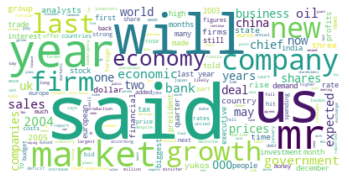

In [23]:
# create a pandas Series of the top 1000 most frequent words
text=bow.loc['business'].sort_values(ascending=False)[:1000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['business'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

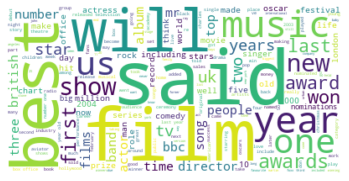

In [24]:
text=bow.loc['entertainment'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['entertainment'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

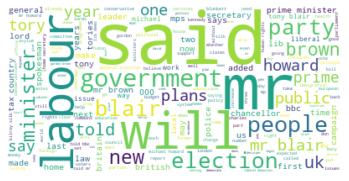

In [25]:
text=bow.loc['politics'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['politics'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

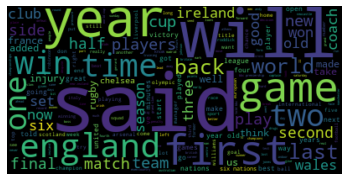

In [26]:
text=bow.loc['sport'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['sport'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='black')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

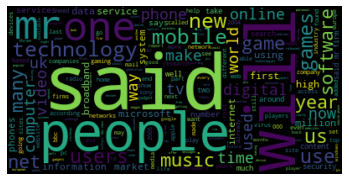

In [27]:
text=bow.loc['tech'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['tech'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='black')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
"""corpus=[]
for i in range(100000):
    text = data.iloc[i,1]
    
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = text.split()
    
    s = PorterStemmer()
    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    corpus.append(text)
    
    if i%1000==0:
        print(i,end='->')"""


"corpus=[]\nfor i in range(100000):\n    text = data.iloc[i,1]\n    \n    text = text.lower()\n    text = re.sub('[^a-z0-9]',' ',text)\n    text = text.split()\n    \n    s = PorterStemmer()\n    text = [s.stem(word) for word in text if not word in set(stopwords.words('english')) ]\n    text = ' '.join(text)\n    corpus.append(text)\n    \n    if i%1000==0:\n        print(i,end='->')"

In [29]:
"""corpus = pd.read_csv('../input/corpus/corpus.csv')
corpus"""

"corpus = pd.read_csv('../input/corpus/corpus.csv')\ncorpus"

In [30]:
#train and test split
X = df['text']
#label encoding the target
label = LabelEncoder()
y = label.fit_transform(df['category'])

#split the train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=2)

In [31]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (1913,)
The X_text shape------> (213,)
THe y_train shape-----> (1913,)
The y_test shape------> (213,)


In [33]:
#tfidf vectorizer

vecto =  TfidfVectorizer(stop_words='english',max_df = 0.99,min_df=10,
                                   ngram_range=(1, 2),lowercase=True, max_features=5000)
vecto = vecto.fit(X_train)

X_train = vecto.transform(X_train).toarray()
X_test = vecto.transform(X_test).toarray()
X_train.shape

(1913, 5000)

In [34]:
print(vecto.get_feature_names())

['000', '000 copies', '000 jobs', '000 new', '000 people', '000 year', '000m', '10', '10 000', '10 000m', '10 minutes', '10 years', '100', '100 000', '100m', '10bn', '11', '11 september', '110', '11bn', '12', '12 months', '120', '13', '14', '15', '15 years', '150', '150 000', '1500m', '16', '17', '17 year', '18', '18 months', '18 year', '19', '1960s', '1970', '1970s', '1980s', '1981', '1983', '1984', '1985', '1987', '1989', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1bn', '1m', '20', '20 000', '20 years', '200', '200 000', '2000', '2001', '2002', '2003', '2004', '2004 according', '2005', '2005 said', '2006', '2007', '2008', '2009', '200m', '2010', '20th', '21', '21st', '22', '22 year', '23', '233', '24', '25', '25 year', '250', '250 000', '26', '27', '27 february', '28', '28 year', '29', '2bn', '2m', '30', '30 000', '30 year', '300', '31', '31 year', '32', '33', '34', '35', '35bn', '36', '37', '38', '39', '3bn', '3d', '3g', '3m', '40', '40

In [35]:
tfidf_df = pd.DataFrame(X_train,columns = vecto.get_feature_names())
tfidf_df.head(4)

,000,000 copies,000 jobs,000 new,000 people,000 year,000m,10,10 000,10 000m,...,young,young people,younger,youth,yuan,yugansk,yuganskneftegas,yukos,zealand,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.052425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035634,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print("The X_train shape----->",X_train.shape)
print('The X_text shape------>',X_test.shape)
print("THe y_train shape----->",y_train.shape)
print("The y_test shape------>",y_test.shape)

The X_train shape-----> (1913, 5000)
The X_text shape------> (213, 5000)
THe y_train shape-----> (1913,)
The y_test shape------> (213,)


  # Model training

In [37]:
def classifier_scores(y_train,y_test, pred_train, pred_test):
    
    print()
    print("Train data accuracy score: ", accuracy_score(y_train,pred_train))    
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))
    print()
    print("Recall score on train data: ", recall_score(y_train,pred_train, average='macro'))
    print("Recall score on test data: ",recall_score( y_test,pred_test, average='macro'))
    print()
    
    print("Precision score on train data: ",precision_score(y_train,pred_train, average='macro'))
    print("Precision score on test data: ",precision_score(y_test,pred_test, average='macro'))
    print()
    print("F1 score on train data: ",f1_score(y_train,pred_train, average='macro'))
    print("F1 score on test data: ",f1_score(y_test,pred_test, average='macro'))

In [38]:
print("Multinamial NB----------------------------------->")
multinb = MultinomialNB()
multinb.fit(X_train , y_train)

y_train_pred = multinb.predict(X_train)
y_test_pred = multinb.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

Multinamial NB----------------------------------->

Train data accuracy score:  0.985363303711448
Test data accuracy score:  0.9577464788732394

Recall score on train data:  0.9848186883333975
Recall score on test data:  0.9509090909090909

Precision score on train data:  0.9849770582865288
Precision score on test data:  0.9474596000097202

F1 score on train data:  0.9848787604127288
F1 score on test data:  0.9490521323194312


In [39]:
print("Compiment NB----------------------------------->")
compnb = ComplementNB(alpha=1.0)
compnb.fit(X_train , y_train)

y_train_pred = compnb.predict(X_train)
y_test_pred = compnb.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

Compiment NB----------------------------------->

Train data accuracy score:  0.9837950862519603
Test data accuracy score:  0.9624413145539906

Recall score on train data:  0.9834764064542029
Recall score on test data:  0.9651948051948052

Precision score on train data:  0.9832079577538698
Precision score on test data:  0.9544948133627379

F1 score on train data:  0.9833146706014301
F1 score on test data:  0.9583525112311746


In [40]:
#model training
gaussion_NB = GaussianNB()
gaussion_NB.fit(X_train , y_train)

y_train_pred = gaussion_NB.predict(X_train)
y_test_pred = gaussion_NB.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  0.9994772608468374
Test data accuracy score:  0.8732394366197183

Recall score on train data:  0.9995525727069351
Recall score on test data:  0.8744025974025973

Precision score on train data:  0.9994579945799458
Precision score on test data:  0.8677344460051227

F1 score on train data:  0.9995046654136424
F1 score on test data:  0.8642708666454167


In [41]:
#logistic Regresssion

log_reg = LogisticRegression()

log_reg.fit(X_train , y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  0.996340825927862
Test data accuracy score:  0.9765258215962441

Recall score on train data:  0.9960769794269337
Recall score on test data:  0.9742857142857144

Precision score on train data:  0.9961567957811426
Precision score on test data:  0.9731816864676907

F1 score on train data:  0.9961155565138451
F1 score on test data:  0.9736351748937562


In [42]:
#logistric regression more accuracy
log_reg_hyper = LogisticRegression(solver='liblinear',n_jobs=-1,penalty='l2',)
log_reg_hyper.fit(X_train , y_train)

y_train_pred = log_reg_hyper.predict(X_train)
y_test_pred = log_reg_hyper.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  0.9932043910088866
Test data accuracy score:  0.9765258215962441

Recall score on train data:  0.992841249823767
Recall score on test data:  0.9742857142857144

Precision score on train data:  0.9932811614194659
Precision score on test data:  0.9731816864676907

F1 score on train data:  0.9930579201866591
F1 score on test data:  0.9736351748937562


In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.7746478873239436

Recall score on train data:  1.0
Recall score on test data:  0.765090909090909

Precision score on train data:  1.0
Precision score on test data:  0.7636891492778746

F1 score on train data:  1.0
F1 score on test data:  0.7631121458201584


In [44]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train , y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.9530516431924883

Recall score on train data:  1.0
Recall score on test data:  0.950935064935065

Precision score on train data:  1.0
Precision score on test data:  0.953319608401278

F1 score on train data:  1.0
F1 score on test data:  0.9517139579697522


In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train , y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)


Train data accuracy score:  1.0
Test data accuracy score:  0.971830985915493

Recall score on train data:  1.0
Recall score on test data:  0.9707142857142858

Precision score on train data:  1.0
Precision score on test data:  0.9675055978504254

F1 score on train data:  1.0
F1 score on test data:  0.969036103772946


In [46]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
classifier_scores(y_train,y_test,y_train_pred,y_test_pred)

[21:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train data accuracy score:  1.0
Test data accuracy score:  0.9624413145539906

Recall score on train data:  1.0
Recall score on test data:  0.96

Precision score on train data:  1.0
Precision score on test data:  0.9573249323050893

F1 score on train data:  1.0
F1 score on test data:  0.9584069528234288
